# Home
* [Initialization](#2)
* [Preparing Data](#3)
* [Studying Terms and Conditions Related to Prepaid Packages](#4)
    * [Aggregating Data per User](#4.1)
    * [Studying User Behavior](#4.2)
    * [Revenue](#4.3)
    * [Testing Statistical Hypotheses](#4.4)
* [General Conclusion](#5)

# Which Prepaid Package is Better? <a id='beranda'></a>

The Megaline company operates in the telecommunications sector. Megaline offers clients two types of prepaid packages: the Surf package and the Ultimate package. This report is aimed at the advertising department, which wants to determine which package is more profitable so they can allocate their advertising budget accordingly.

The Analysis Department conducted an initial analysis of data from 500 clients. This data contains information such as who they are, where they come from, which package they use, as well as the number of calls and messages they sent in 2018. This data is used to observe user behavior and determine which prepaid package is more profitable.

This project broadly goes through several stages: preparing data, exploring data, cleaning data, analyzing data, and testing hypotheses.

The hypotheses we will test this time are:

* Examining the difference in average revenue between the two prepaid packages.
* Determining whether the average revenue of prepaid packages in the NY-NJ area differs from the revenue in other regions.

# Initialization <a id='2'></a>

This project utilizes several libraries, namely:

* Pandas: Data manipulation and analysis.
* Matplotlib: Data visualization and graphics.
* Seaborn: Statistical data visualization.
* NumPy: Numerical operations with arrays.
* SciPy: Advanced scientific functions.

In [1]:
# Load all libraries
# loading table and data manipulation libraries
import pandas as pd

# loading data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# loading function and operation libraries
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

## Loading Data <a id='memuat_data'></a>

The data analyst team took 5 sample data files from the company's database, all in csv format. Each dataset contains data on the number of phone calls, the number of SMS each user sends, the amount of internet used, user data, and data on which package our clients are using. The file paths for each dataset are as follows:

* dataset containing calls = '/datasets/megaline_calls.csv'
* dataset containing internet usage = '/datasets/megaline_internet.csv'
* dataset containing user data = '/datasets/megaline_users.csv'
* dataset containing SMS usage = '/datasets/megaline_messages.csv'
* dataset containing plans = '/datasets/megaline_plans.csv'

However, because the data analyst team is using different platforms in this project, we will use slightly different methods and file paths.

In [2]:
# Load data files into different DataFrames
plans = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project4-megaline-marketing-sales/megaline_plans.csv')
users = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project4-megaline-marketing-sales/megaline_users.csv')
calls = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project4-megaline-marketing-sales/megaline_calls.csv')
messages = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project4-megaline-marketing-sales/megaline_messages.csv')
internet = pd.read_csv('https://raw.githubusercontent.com/milawidyalestari/data-analyst-ml-project/project4-megaline-marketing-sales/megaline_internet.csv')

# Preparing Data <a id='3'></a>

After importing the datasets, we will prepare them. In this stage, we will review the data, fix data & data types, enrich data quality, and remove any duplicates.

## Prepaid Packages

In [3]:
# Display general information/summary about the plans DataFrame
print(plans.info())
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Displaying sample data
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Summary of the plans table (phone plans data):**
- plan_name — the name of the phone plan
- usd_monthly_fee — the monthly fee in US dollars
- minutes_included — the number of monthly call minutes included in the plan
- messages_included — the number of monthly SMS messages included in the plan
- mb_per_month_included — the volume of data included in the plan per month (in megabytes)
- usd_per_minute — the price per minute if the monthly call minutes are exceeded (e.g., if the plan includes 100 minutes, usage beyond the 100th minute will be charged)
- usd_per_message — the price per SMS if the monthly SMS limit is exceeded
- usd_per_gb — the price per additional gigabyte of data if the monthly data limit is exceeded (1 GB = 1024 megabytes)

It seems there is nothing wrong with this table, so we will skip it.

## Users

In [5]:
# Display general information/summary about the users DataFrame
print(users.info())

users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
# Display sample user data
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [7]:
# Viewing the percentage of NaN values
nan_churn_date = users[users['churn_date'].isnull()]
churn_date_percentage = len(nan_churn_date) / len(users) * 100
print('Number of NaN values in the churn_date column:: {:.2f}%'.format(churn_date_percentage))

Number of NaN values in the churn_date column:: 93.20%


**Summary of the users table (user data):**
- user_id — user ID
- first_name — user's first name
- last_name — user's last name
- age — user's age (years)
- reg_date — subscription date (dd, mm, yy)
- churn_date — date the user stopped using the service (if the value is missing or NaN, it means the user is still using the service as of the data extraction date)
- city — user's city of residence
- plan — the name of the phone plan

The `'reg_date'` column does not yet have the appropriate data type. The `'churn_date'` column has missing values. However, it was mentioned that if the value is NaN, it means the user is using the service at the time the data was extracted.

### Fixing Data

Based on the identified issues, we will change the data type of the `'reg_date'` column. We will also see if we need to remove NaN values in the `'churn_date'` column.

In [8]:
# fixing data type for 'reg_data' and 'churn_date'
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

## Calls

In [9]:
# Display general information/summary about the calls DataFrame
print(calls.info())
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [10]:
# Display sample data containing calls
calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


**Summary of the calls table (call data):**
- id — unique call ID
- call_date — date of the call
- duration — call duration (in minutes)
- user_id — ID of the user making the call

It seems that the `'call_date'` column has an incorrect data type. We should change this column to datetime. Upon further investigation, it appears that there are some users who made calls with a duration of 0.0 seconds. We will check how many users have such durations and decide whether these users should be excluded or not.

In [11]:
# viewing the number of 0-second durations
zero_duration = calls[calls['duration'] == 0]
duration_percentage = len(zero_duration) / len(calls) * 100
print('Number of calls with 0-second duration (in percentage): {:.2f}%'.format(duration_percentage))

Number of calls with 0-second duration (in percentage): 19.48%


In [12]:
# viewing and considering the number of users who made calls with a 0-second duration
zero_duration['user_id'].drop_duplicates().count()

478

It seems that almost all users have made calls with a 0-second duration. These calls could possibly be unanswered calls. Our company rounds up if a user makes a call, even if it's only for 1 second. But if it's 0 seconds, it shouldn't be counted as "making a call," right? So, we'll just eliminate these entries.

### Fixing Data

We will fix the data type of the `'call_date'` column and eliminate calls with a 0-second duration.

In [13]:
# changing the data type of calls_date
calls['call_date'] = pd.to_datetime(calls['call_date'])

# eliminating calls with a 0-second duration
calls = calls.drop(calls[calls['duration'] == 0].index)

### Enhancing Data Quality

Since our company rounds up all call durations to the nearest minute, we need to create a new column that contains the rounded-up minutes for all calls. Also, we will add a month column since this is a monthly package.

In [14]:
# creating a new column containing the minutes of each call duration
calls['duration_minute'] = calls['duration'].astype(int)
calls['duration_sec'] = calls['duration'] - calls['duration_minute']
calls['call_minute'] = calls['duration_minute'] + np.where(calls['duration_sec']  <= 0.6, 1, 2)

# deleting the 'duration_minute' and 'duration_sec' columns
calls.drop(['duration_minute','duration_sec'], axis= 1, inplace = True)

# creating a month column in the calls dataset
calls['month'] = calls['call_date'].dt.month
calls

,id,user_id,call_date,duration,call_minute,month
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,15,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,7,12
4,1000_380,1000,2018-12-30,4.22,5,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,10,11
137731,1499_200,1499,2018-10-20,10.89,12,10
137732,1499_201,1499,2018-09-21,8.12,9,9
137733,1499_202,1499,2018-10-10,0.37,1,10


Now we have the additional data we need. We could have used the `np.ceil()` function to round up the call durations. However, there was an issue with the seconds in the duration. If we want to round the decimal places to the nearest minute, where 1 minute = 0.6, using the `np.ceil()` function wouldn't be accurate.

## Messages/SMS

In [15]:
# Display general information/summary about the SMS DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Display sample data for SMS
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Summary of the messages table (SMS data):**
- id — unique SMS ID
- message_date — date the SMS was sent
- user_id — ID of the user who sent the SMS

Similar to the calls table, the `'message_date'` column is also not in datetime format.

### Fixing Data
Since the `'message_date'` data type is not datetime, we will change it now.

In [17]:
# changing the data type of 'message_date'
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enhancing Data Quality

In [18]:
# adding a month column to the messages dataset
messages['month'] = messages['message_date'].dt.month
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [19]:
# Display general information/summary about the internet DataFrame
print(internet.info())
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [20]:
# Display sample data for internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Summary of the internet table (web session data):**
- id — unique web session ID
- mb_used — volume of data used during the session (in megabytes)
- session_date — date of the web session
- user_id — user ID

It turns out that the `'session_date'` column, which contains the date, is also not in datetime format.

### Fixing Data

In [21]:
# fixing the data type of 'session_date'
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enhancing Data Quality

We will add some important factors that will facilitate our analysis, namely a month column and internet usage in gigabytes (1 GB = 1024 megabytes).

In [22]:
# adding a month column
internet['month'] = internet['session_date'].dt.month

# adding a gigabyte column
internet_per_month = internet.groupby(['user_id', 'month']).agg({
    'mb_used': 'sum',
    'id' : 'count'
}).reset_index().rename(columns= {'id' : 'traffic_counts'})

internet_per_month['gb_used'] = internet_per_month['mb_used'] / 1024
internet_per_month['gb_used_round'] = np.ceil(internet_per_month['gb_used']).astype(int)
internet_per_month

,user_id,month,mb_used,traffic_counts,gb_used,gb_used_round
0,1000,12,1901.47,5,1.856904,2
1,1001,8,6919.15,25,6.756982,7
2,1001,9,13314.82,53,13.002754,14
3,1001,10,22330.49,56,21.807119,22
4,1001,11,18504.30,51,18.070605,19
...,...,...,...,...,...,...
2272,1498,12,23137.69,65,22.595400,23
2273,1499,9,12984.76,45,12.680430,13
2274,1499,10,19492.43,61,19.035576,20
2275,1499,11,16813.83,49,16.419756,17


# Studying Terms and Conditions Related to Prepaid Packages <a id='4'></a>

Now the DataFrames we use are at least clean and have been enriched with additional information. Let's now look at the Terms and Conditions Related to Prepaid Packages.

In [23]:
# Display the prepaid package terms and ensure you understand them
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregating Data per User <a id='4.1'></a>

The table above shows the terms and conditions of the prepaid package per month. In this stage, we will aggregate the data for each user per period.

In [24]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id', 'month']).agg({
    'id' : 'count',
    'call_minute' : 'sum'
}).reset_index().rename(columns= {
    'id': 'call_counts',
    'call_minute' : 'total_minute'
})

calls_per_month

,user_id,month,call_counts,total_minute
0,1000,12,16,132
1,1001,8,22,193
2,1001,9,38,333
3,1001,10,47,418
4,1001,11,49,448
...,...,...,...,...
2251,1498,12,32,352
2252,1499,9,35,362
2253,1499,10,41,398
2254,1499,11,39,323


In [26]:
# Calculate the number of SMS sent by each user per month. Save the result.
messages_per_month = messages.groupby(['user_id', 'month']).agg({
    'id' : 'count',
}).reset_index().rename(columns= {'id': 'message_counts'})

messages_per_month

,user_id,month,message_counts
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


**Summary Up to This Stage**

Up to this stage, we have cleaned the data, fixed and added information to our DataFrame. Most recently, we have aggregated user data per month. The next step is to combine the aggregated DataFrames into onnth.

In [27]:
# Merge call, minute, SMS, and internet data based on user_id and month.
merge_df = pd.merge(calls_per_month, messages_per_month, on= ['user_id', 'month'], how= 'outer')
merge_df = pd.merge(merge_df, internet_per_month, on= ['user_id', 'month'], how= 'outer')
merge_df.drop(['mb_used', 'traffic_counts', 'gb_used'],axis= 1, inplace= True)
merge_df

,user_id,month,call_counts,total_minute,message_counts,gb_used_round
0,1000,12,16.0,132.0,11.0,2.0
1,1001,8,22.0,193.0,30.0,7.0
2,1001,9,38.0,333.0,44.0,14.0
3,1001,10,47.0,418.0,53.0,22.0
4,1001,11,49.0,448.0,36.0,19.0
...,...,...,...,...,...,...
2288,1407,11,NaN,NaN,1.0,1.0
2289,1482,10,NaN,NaN,2.0,NaN
2290,1094,10,NaN,NaN,NaN,2.0
2291,1108,12,NaN,NaN,NaN,1.0


In [28]:
# Add prepaid package information
users_merge = pd.merge(users, plans, left_on= 'plan', right_on= 'plan_name')
users_merge['gb_per_month_included'] = users_merge['mb_per_month_included'] / 1024
users_merge.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'mb_per_month_included'],axis= 1, inplace= True)
users_merge.head()

,user_id,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30.0


In [29]:
# Merge merge_df with user_merge
final_df = pd.merge(merge_df, users_merge, on= 'user_id', how= 'inner')

In [30]:
# View the number of null values
final_df.isnull().sum().sort_values(ascending= False)

message_counts           487
call_counts               37
total_minute              37
gb_used_round             16
user_id                    0
month                      0
city                       0
plan                       0
messages_included          0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
gb_per_month_included      0
dtype: int64

In [31]:
# Fill null values
final_df = final_df.fillna(0)

# Change data types
columns= ['call_counts', 'total_minute', 'message_counts', 'gb_used_round', 'gb_per_month_included']
final_df[columns] = final_df[columns].astype(int)
final_df.head()

,user_id,month,call_counts,total_minute,message_counts,gb_used_round,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,16,132,11,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30
1,1001,8,22,193,30,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
2,1001,9,38,333,44,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
3,1001,10,47,418,53,22,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15
4,1001,11,49,448,36,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15


In [32]:
# Create a function to find
def charge(row, total, included, usd): 
    if row['plan'] == 'surf':
        if row[total] > row[included]:
            charge = (row[total] - row[included]) * row[usd]
        else:
            charge = 0
    elif row['plan'] == 'ultimate':
        if row[total] > row[included]:
            charge = (row[total] - row[included]) * row[usd]
        else:
            charge = 0
    return charge

In [33]:
# Compare the call duration of each package per month
final_df['call_fee'] = final_df.apply(lambda row: charge(row, 'total_minute', 'minutes_included', 'usd_per_minute'), axis=1)
final_df['message_fee'] = final_df.apply(lambda row: charge(row, 'message_counts', 'messages_included', 'usd_per_message'), axis=1)
final_df['internet_fee'] = final_df.apply(lambda row: charge(row, 'gb_used_round', 'gb_per_month_included', 'usd_per_gb'), axis=1)
final_df['revenue'] = final_df['usd_monthly_pay'] + final_df['call_fee'] + final_df['message_fee'] + final_df['internet_fee']

In [34]:
final_df

,user_id,month,call_counts,total_minute,message_counts,gb_used_round,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,call_fee,message_fee,internet_fee,revenue
0,1000,12,16,132,11,2,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.00,0,70.00
1,1001,8,22,193,30,7,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.00,0,20.00
2,1001,9,38,333,44,14,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.00,0,20.00
3,1001,10,47,418,53,22,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.09,70,90.09
4,1001,11,49,448,36,19,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.00,40,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1204,12,0,0,78,36,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,ultimate,30,0.0,0.00,42,112.00
2289,1349,10,0,0,76,13,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.78,0,20.78
2290,1349,11,0,0,72,17,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.66,20,40.66
2291,1349,12,0,0,61,13,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,surf,15,0.0,0.33,0,20.33


## Studying User Behavior<a id='4.2'></a>alls

In this stage, we will find out the behavior of each user in making calls, sending messages, and internet web traffic that they have done. We will later look at the distribution of all of these to determine which one will be most beneficial for our company when creating advertisements later.


### Calls

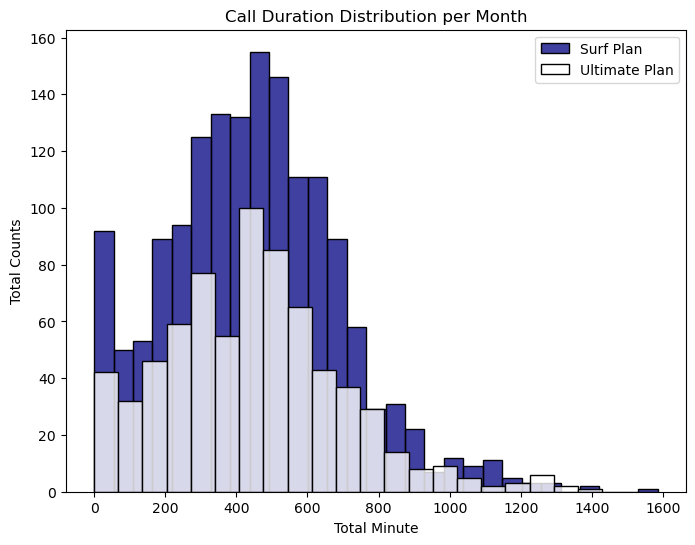

In [35]:
# Compare the call duration per month
surf_df = final_df[final_df['plan'] == 'surf'].reset_index()
ultimate_df = final_df[final_df['plan'] == 'ultimate'].reset_index()


plt.figure(figsize= (8, 6))
sns.histplot(surf_df, x= 'total_minute', color= 'navy', label= 'Surf Plan')
sns.histplot(ultimate_df, x= 'total_minute', color= 'white', alpha= 0.8, label= 'Ultimate Plan')

plt.title('Call Duration Distribution per Month')
plt.ylabel('Total Counts')
plt.xlabel('Total Minute')
plt.legend()
plt.show()

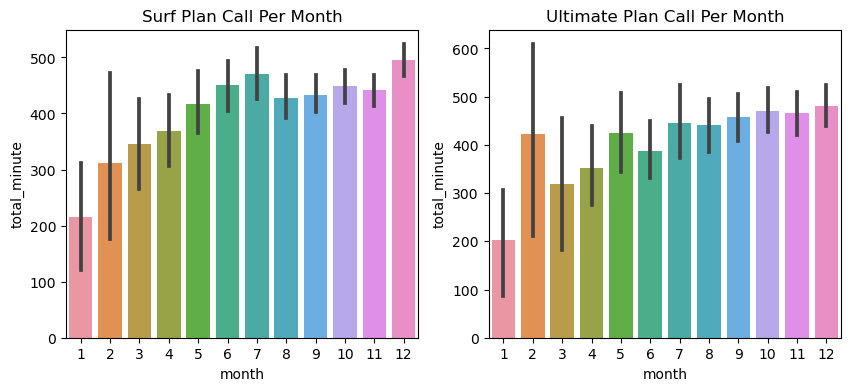

In [36]:
# Compare the call duration per month
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data= surf_df, x= 'month', y= 'total_minute')
plt.title('Surf Plan Call Per Month')

plt.subplot(1, 2, 2)
sns.barplot(data= ultimate_df, x= 'month', y= 'total_minute')
plt.title('Ultimate Plan Call Per Month')
plt.show()

**Details From the Above Graphs**

* In th`e 'Call Duration Distribution per Mont`h' plot above, it can be seen that users who use the Surf package make more calls compared to users who choose Ultimate. However, the average call duration for both packages is the same, around 400-500 minutes per month.

* Then, in the bar plot above, the busiest month for Surf package users appears to be December. Perhaps this is because of Christmas?
* In contrast, the Ultimate package, February has a call duration with a larger spread of data.anggilan dengan persebaran data yang lebih besar. 

In [37]:
# Calculate the mean and variance of monthly call duration
print(surf_df['total_minute'].describe())
print()
print(ultimate_df['total_minute'].describe())

count    1573.000000
mean      447.956771
std       244.586213
min         0.000000
25%       283.000000
50%       446.000000
75%       601.000000
max      1585.000000
Name: total_minute, dtype: float64

count     720.000000
mean      449.840278
std       250.945031
min         0.000000
25%       273.000000
50%       443.500000
75%       592.000000
max      1429.000000
Name: total_minute, dtype: float64


In [38]:
# find the variance value
print(np.var(surf_df['total_minute']))
print()
print(np.var(ultimate_df['total_minute']))

59784.384653778885

62885.9453221451


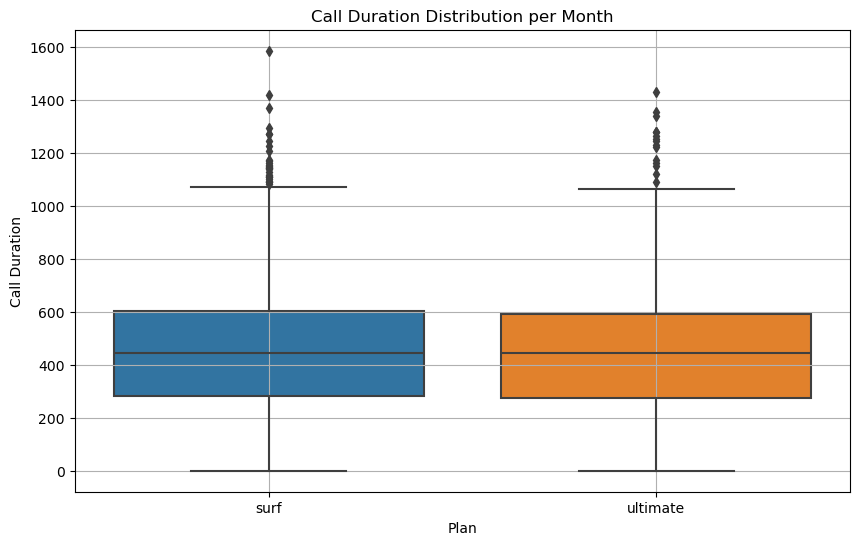

In [39]:
# Create a boxplot to visualize the distribution of monthly call duration
surf_df['plan'] = 'surf'
ultimate_df['plan'] = 'ultimate'
merged_df = pd.concat([surf_df, ultimate_df])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='plan', y='total_minute')

plt.xlabel('Plan')
plt.ylabel('Call Duration')
plt.title('Call Duration Distribution per Month')
plt.grid(True)
plt.show()

**Conclusion from the explanations and plots above:**

* **Surf Package:** 
    * has an average call duration of 447 minutes per month.
    * this package has a smaller call variance than the Ultimate package.
    * the boxplot shows that outliers start from 1050 minutes.
    
    
* **Ultimate Package:**
    * the average call duration of this package is 450 minutes per month.
    * the call duration of the Ultimate Package is actually more widely spread from the average compared to the Surf package.
    * the furthest outlier from this package is actually smaller than the Surf package.

### Messages/SMS

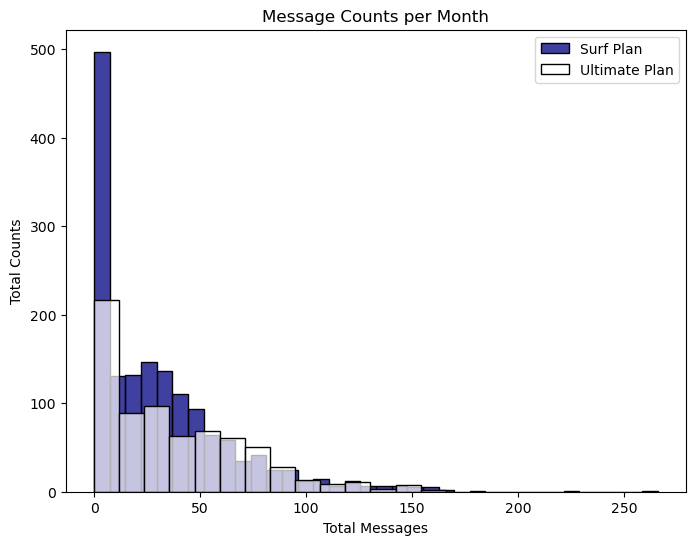

In [40]:
# Compare the number of SMS messages typically sent by users of each package per month
plt.figure(figsize= (8, 6))
sns.histplot(surf_df, x= 'message_counts', color= 'navy', label= 'Surf Plan')
sns.histplot(ultimate_df, x= 'message_counts', color= 'white', alpha= 0.7, label= 'Ultimate Plan')

plt.title('Message Counts per Month')
plt.ylabel('Total Counts')
plt.xlabel('Total Messages')
plt.legend()
plt.show()

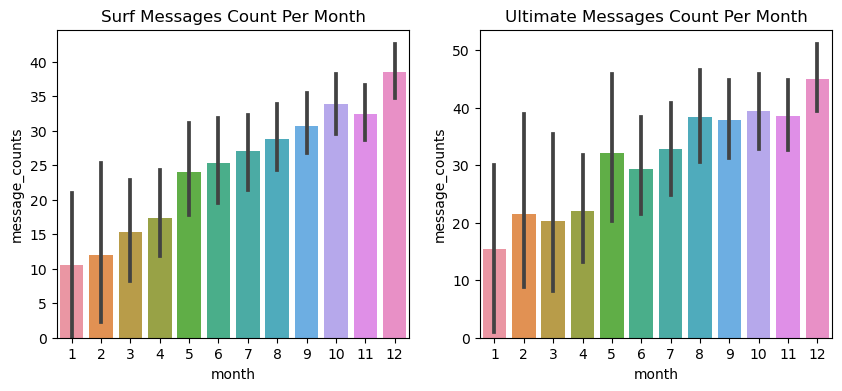

In [41]:
# view the number of messages sent each month
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data= surf_df, x= 'month', y= 'message_counts')
plt.title('Surf Messages Count Per Month')

plt.subplot(1, 2, 2)
sns.barplot(data= ultimate_df, x= 'month', y= 'message_counts')
plt.title('Ultimate Messages Count Per Month')
plt.show()

**Details from the Above Graph**

* the histogram shows that most users send at least less than 50 messages per month. although the Ultimate package has a more evenly distributed data compared to the Surf package.
* Surf package users on average send less than 40 messages per month. this is smaller than Ultimate package users who send more than 40 messages. even though the number of messages sent each month is slightly different.

In [42]:
# Compare the number of messages sent by users per package
print(surf_df['message_counts'].describe())
print()
print(ultimate_df['message_counts'].describe())

count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: message_counts, dtype: float64

count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: message_counts, dtype: float64


In [43]:
# find the variance value of the number of messages sent
print(np.var(surf_df['message_counts']))
print()
print(np.var(ultimate_df['message_counts']))

1126.0082317266636

1207.0779147376504


**Conclusion:**

* **Surf Package:** 
    * each user sends an average of 31 messages every month.
    * the variance of the data is 1126, meaning the data spread is closer to its average.

* **Ultimate Package:**
    * users send 37 messages per month, slightly more than the Surf package.
    * the data spread from the average is wider than the Surf package.

### Internet Usage

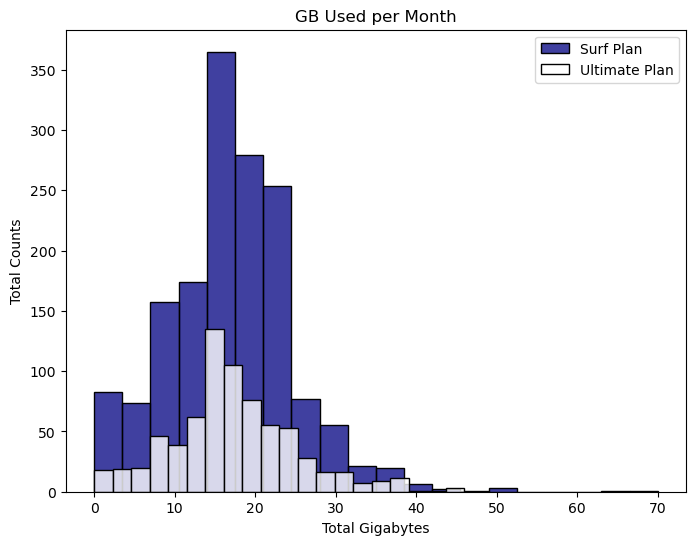

In [44]:
plt.figure(figsize= (8, 6))
sns.histplot(surf_df, bins= 20,x= 'gb_used_round', color= 'navy', label= 'Surf Plan')
sns.histplot(ultimate_df, bins= 20,x= 'gb_used_round', color= 'white', alpha= 0.8, label= 'Ultimate Plan')

plt.title('GB Used per Month')
plt.ylabel('Total Counts')
plt.xlabel('Total Gigabytes')
plt.legend()
plt.show()

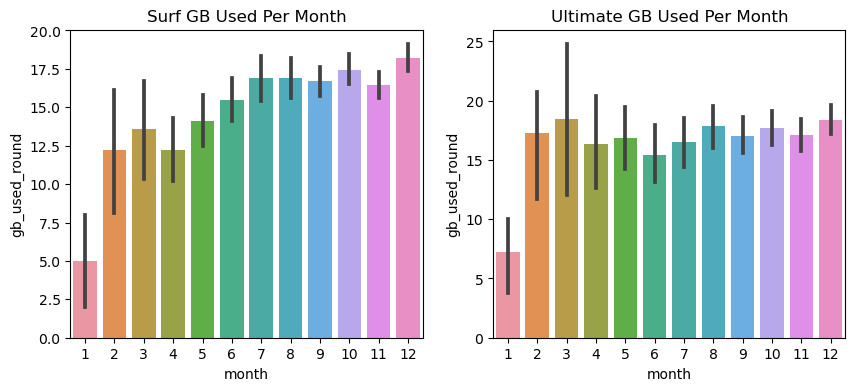

In [45]:
# view the internet usage per month
plt.figure(figsize= (10, 4))
plt.subplot(1, 2, 1)
sns.barplot(data= surf_df, x= 'month', y= 'gb_used_round')
plt.title('Surf GB Used Per Month')

plt.subplot(1, 2, 2)
sns.barplot(data= ultimate_df, x= 'month', y= 'gb_used_round')
plt.title('Ultimate GB Used Per Month')
plt.show()

In [46]:
# Compare the amount of GB used by users per package
print(surf_df['gb_used_round'].describe())
print()
print(ultimate_df['gb_used_round'].describe())

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_round, dtype: float64

count    720.000000
mean      17.306944
std        7.670108
min        0.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_round, dtype: float64


In [47]:
# find the variance value of the amount of GB sent
print(np.var(surf_df['gb_used_round']))
print()
print(np.var(ultimate_df['gb_used_round']))

61.544449424470294

58.748840663580154


**Conclusion**

* Users who choose the Surf package actually use more internet than the limit provided. In contrast, Ultimate package users rarely exceed their internet limit per month.
* Unlike Surf package users, Ultimate package users only use below 20 GB of internet per month.

## Revenue<a id='4.3'></a>

Now we've reached a crucial stage. The advertising department wants us to see which package is more profitable. In this stage, we will look at various sources of revenue for each package. Starting from total revenue, revenue from internet, messages, calls, and then see the total revenue from both packages each month.

In [48]:
# view the distribution of revenue in general
final_df.groupby('plan')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,61.036618,55.498472,20.0,20.0,40.51,81.2,591.78
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.00,70.0,182.00


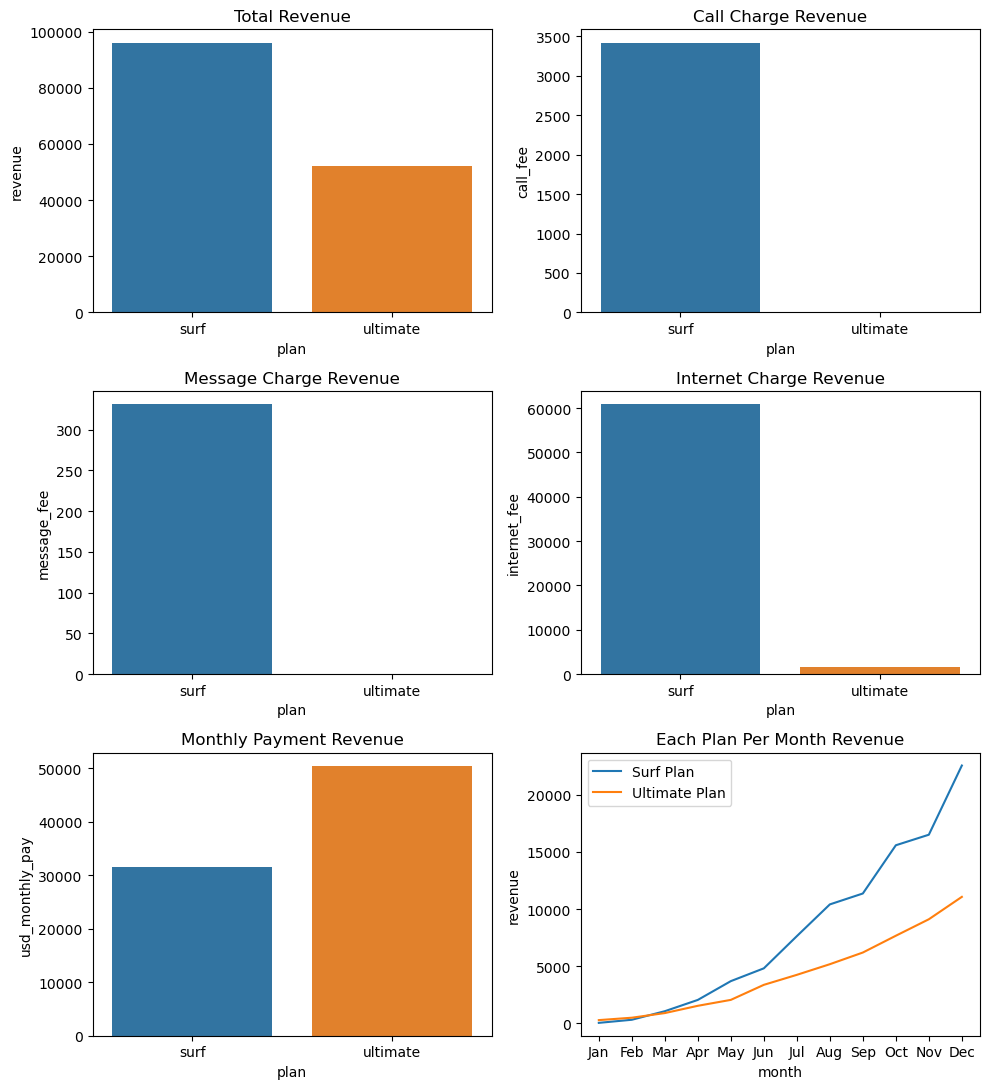

In [49]:
# total revenue for each package
revenue = final_df.groupby('plan')['revenue'].sum().reset_index()
call_revenue = final_df.groupby('plan')['call_fee'].sum().reset_index()
message_revenue = final_df.groupby('plan')['message_fee'].sum().reset_index()
internet_revenue = final_df.groupby('plan')['internet_fee'].sum().reset_index()
monthly_payment = final_df.groupby('plan')['usd_monthly_pay'].sum().reset_index()
month_surf = surf_df.groupby('month')['revenue'].sum().reset_index()
month_ult = ultimate_df.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize= (10, 11))
plt.subplot(3,2,1)
sns.barplot(data=revenue, x='plan', y='revenue')
plt.title('Total Revenue')

plt.subplot(3,2,2)
sns.barplot(data=call_revenue, x='plan', y='call_fee')
plt.title('Call Charge Revenue')

plt.subplot(3,2,3)
sns.barplot(data=message_revenue, x='plan', y='message_fee')
plt.title('Message Charge Revenue')

plt.subplot(3,2,4)
sns.barplot(data=internet_revenue, x='plan', y='internet_fee')
plt.title('Internet Charge Revenue')

plt.subplot(3,2,5)
sns.barplot(data=monthly_payment, x='plan', y='usd_monthly_pay')
plt.title('Monthly Payment Revenue')

# membuat lineplot untuk revenue per bulan
plt.subplot(3,2,6)
sns.lineplot(data=month_surf, x='month', y='revenue', label= 'Surf Plan')
sns.lineplot(data=month_ult, x='month', y='revenue', label= 'Ultimate Plan')
plt.xticks(month_ult['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Each Plan Per Month Revenue')

plt.tight_layout()
plt.show()

**Conclusion:**

1. The package with the highest revenue is the Surf package.
2. The largest source of revenue for both the Surf and Ultimate packages after monthly payments is from internet fees. The Ultimate package, however, derives its largest revenue from its monthly payments.
3. The Surf package generates higher revenue every month.

Despite the Ultimate package being priced higher and incurring lower charges compared to the Surf package, it still cannot surpass the cost-effectiveness of the Surf package even though its charges are higher. Users seem to be unaware of this wastefulness.

## Statistical Hypothesis Testing<a id='4.4'></a>

The advertising department also wants to see if the average revenue from Ultimate and Surf package users is different, and if the average revenue from users in the NY-NJ area is different from the revenue from users in other areas. Next, we will test these two hypotheses.

**Hypotheses to be tested:**
1. The average revenue from Ultimate and Surf package users is different.
2. The average revenue from users in the NY-NJ area is different from the revenue from users in other areas.

To test the hypothesis that the average revenue from Ultimate and Surf package users is different, we can use a t-test for independent samples. Here's the formulation:

* **Null Hypothesis (H₀):** The average revenue from Ultimate and Surf package users is the same.
* **Alternative Hypothesis (H₁):** The average revenue from Ultimate and Surf package users is different.

We'll conduct the t-test using the `scipy.stats` module. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis, suggesting that there is a significant difference in the average revenue between the two packages.

In [50]:
# Creating a new dataset
df_surf = surf_df['revenue'].reset_index(drop=True)
ulti_df = ultimate_df['revenue'].reset_index(drop=True)

# Comparing the two DataFrame variances
np.var(df_surf), np.var(ulti_df)

(3078.1223551222824, 129.66814043209837)

There is a significant difference in variances. It's better to use `equal_var=False` because this will produce more accurate calculations.

In [51]:
# Hypothesis Testing for the Average Revenue of Both Packages

alpha = 0.05

result = st.ttest_ind(df_surf, ulti_df, equal_var=False)

print('The p-value is', result.pvalue)

if result.pvalue < alpha:
    print('Hypothesis: The average revenue of both packages is different.')
else:
    print('Hypothesis: The average revenue of both packages is the same.')

The p-value is 2.01698941964833e-14
Hypothesis: The average revenue of both packages is different.


**Conclusion:**
The results show that the two average revenues are indeed different, so we can accept the first hypothesis.

Next, we will test the second hypothesis, which is whether the average revenue of users in the NY-NJ area is different from the revenue of users in other areas.

In [52]:
# Filtering data
ny_nj_revenue = final_df[final_df['city'].str.contains('NY-NJ')][['revenue']].reset_index(drop= True)
city_revenue = final_df[~final_df['city'].str.contains('NY-NJ')][['revenue']].reset_index(drop= True)

np.var(ny_nj_revenue), np.var(city_revenue)

(revenue    1895.192399
 dtype: float64,
 revenue    2231.177215
 dtype: float64)

In [53]:
# Testing the hypothesis of average city income
alpha = 0.05

result = st.ttest_ind(ny_nj_revenue, city_revenue, equal_var=False)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Hypothesis: The average income of NY-NJ is different from other cities')
else:
    print('Hypothesis: The average income of all cities is the same')

p-value: [0.03596981]
Hypothesis: The average income of NY-NJ is different from other cities


**Conclusion:**

The test result indicates that the NY-NJ city has a different income compared to other cities. So, the second hypothesis can be accepted.

# General Conclusion

We have cleaned and analyzed data from 500 Megaline clients. The advertising department can now determine which package generates more revenue for our company.

- After analyzing the income from each package, it can be confirmed that the Surf package generates more revenue for our company.
  
- In addition to the monthly subscription fee, the Surf package's largest revenue comes from the internet usage charges. Therefore, the advertising department can highlight the faster and more secure internet usage in their ads to attract more clients to choose Megaline's internet package.
  
- The hypothesis testing convincingly shows that the average revenue per user from both packages is indeed different. The Surf package is more preferred by our clients, making it more profitable. In fact, the revenue from this package is almost 2 times higher than that of the Ultimate package.
  
- Each city has different product preferences. Hence, each city generates different revenues, especially in New York-Jersey. Perhaps the advertising department needs a strategy to target more people in different cities.